# Mn tuning


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import cmocean
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import pickle
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar

%matplotlib notebook

###### Parameters:

In [12]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

results_folder10 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up0/'
results_folder11 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up1/'
results_folder12 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up2/'
results_folder20 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up0-ice1/'
results_folder21 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up1-ice1/'
results_folder22 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up2-ice1/'
results_folder30 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up0-ice2/'
results_folder31 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up1-ice2/'
results_folder32 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up2-ice2/'
results_folder40 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up0-ice3/'
results_folder41 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up1-ice3/'
results_folder42 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up2-ice3/'
results_folder50 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up0-ice4/'
results_folder51 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up1-ice4/'
results_folder52 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up2-ice4/'
results_folder60 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up0-sed1/'
results_folder61 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up1-sed1/'
results_folder62 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up2-sed1/'
results_folder70 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up0-sed2/'
results_folder71 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up1-sed2/'
results_folder72 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up2-sed2/'
results_folder80 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up0-sed3/'
results_folder81 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up1-sed3/'
results_folder82 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up2-sed3/'
results_folder90 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up0-sed4/'
results_folder91 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up1-sed4/'
results_folder92 = '/data/brogalla/run_storage/tuning-202004/ref-spin-up2-sed4/'

year  = 2002
month = 8

# colours:
obs_CB     = '#b23333'
obs_CAA    = '#d89999'
mod_CB     = '#006f99'
mod_CAA    = '#99c5d6'
land_color = "#8b7765"

###### Load files:

In [13]:
mesh       = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
mesh_lon   = np.array(mesh.variables['nav_lon'])
mesh_lat   = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])

In [14]:
mask     = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh_zgr10.nc')
tmask    = np.array(mask.variables['tmask'][0,:,:,:])
Z_masked = np.ma.masked_where((tmask > 0.1), tmask) 

Model results

In [15]:
stn_i = [104-1, 100, 91, 175, 175, 233, 214, 352, 242, 458, 508, 547, 629]
stn_j = [370, 365, 353, 311, 326, 313, 281, 281, 364, 332, 384, 457, 471]
stn_k = [32, 32, 32, 25, 27, 28, 26, 31, 29, 30, 37, 45, 45]

In [16]:
c = nc.Dataset(results_folder10+'ANHA12_EXH006_'+str(year)+'_monthly.nc', 'r')
lat_model    = np.array(c.variables['nav_lat'])
lon_model    = np.array(c.variables['nav_lon'])
depths_model = np.array(c.variables['deptht'])

Observations

In [17]:
Mn_data  = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Mn_Integrated_Data_UBC-UVic_4-17-19.csv')

dMn_BB1  = Mn_data['BB1'].dropna()[1:].astype('float'); dMn_BB2 = Mn_data['BB2'].dropna()[1:].astype('float');
dMn_BB3  = Mn_data['BB3'].dropna()[1:].astype('float'); dMn_CB1 = Mn_data['CB1'].dropna()[1:].astype('float');
dMn_CB2  = Mn_data['CB2'].dropna()[1:].astype('float'); dMn_CB3 = Mn_data['CB3'].dropna()[1:].astype('float');
dMn_CB4  = Mn_data['CB4'].dropna()[1:].astype('float'); dMn_CAA1 = Mn_data['CAA1'].dropna()[1:].astype('float');
dMn_CAA2 = Mn_data['CAA2'].dropna()[1:].astype('float'); dMn_CAA3 = Mn_data['CAA3'].dropna()[1:].astype('float');
dMn_CAA4 = Mn_data['CAA4'].dropna()[1:].astype('float'); dMn_CAA5 = Mn_data['CAA5'].dropna()[1:].astype('float');
dMn_CAA6 = Mn_data['CAA6'].dropna()[1:].astype('float'); dMn_CAA7 = Mn_data['CAA7'].dropna()[1:].astype('float');
dMn_CAA8 = Mn_data['CAA8'].dropna()[1:].astype('float'); dMn_CAA9 = Mn_data['CAA9'].dropna()[1:].astype('float');

depth_BB1  = Mn_data['Depth.2'].dropna(); depth_BB2 = Mn_data['Depth.3'].dropna();
depth_BB3  = Mn_data['Depth.4'].dropna(); depth_CB1 = Mn_data['Depth.14'].dropna();
depth_CB2  = Mn_data['Depth.15'].dropna(); depth_CB3 = Mn_data['Depth.16'].dropna();
depth_CB4  = Mn_data['Depth.17'].dropna(); depth_CAA1 = Mn_data['Depth.5'].dropna();
depth_CAA2 = Mn_data['Depth.6'].dropna(); depth_CAA3 = Mn_data['Depth.7'].dropna();
depth_CAA4 = Mn_data['Depth.8'].dropna(); depth_CAA5 = Mn_data['Depth.9'].dropna();
depth_CAA6 = Mn_data['Depth.10'].dropna(); depth_CAA7 = Mn_data['Depth.11'].dropna();
depth_CAA8 = Mn_data['Depth.12'].dropna(); depth_CAA9 = Mn_data['Depth.13'].dropna();

In [18]:
bottom_depths =[np.amax(d) for d in [depth_CAA1, depth_CAA2, depth_CAA3, depth_CAA4, depth_CAA5, depth_CAA6, \
                            depth_CAA7, depth_CAA8, depth_CAA9, depth_CB1, depth_CB2, depth_CB3, depth_CB4]]

In [19]:
Pb_data   = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names = Pb_data['Station names'].dropna().astype('str')
lons      = Pb_data['station lon'].astype('float').dropna().values
lats      = Pb_data['Station lat'].astype('float').dropna().values

##### Define functions:

In [20]:
def find_index_ANHA12_full(transect_lons, transect_lats, ANHA12_lon=mesh_lon, ANHA12_lat=mesh_lat):
    # input:   ANHA12_lon, ANHA12_lat       --- 2400x1632 coordinates
    #          transect_lons, transect_lats --- list of lat and lon values to include in the transect
    # output:  i, j                         --- lists of coordinates associated with these points
    
    transect_i = np.array([])
    transect_j = np.array([])
    if isinstance(transect_lons,float):
        i, j = ar.find_closest_model_point(transect_lons, transect_lats, ANHA12_lon, ANHA12_lat)
        transect_i = i
        transect_j = j
    else:
        for k in range(0,len(transect_lons)):
            i, j = ar.find_closest_model_point(transect_lons[k], transect_lats[k], ANHA12_lon, ANHA12_lat)
            transect_i = np.append(transect_i, i)
            transect_j = np.append(transect_j, j)
    
    return transect_i, transect_j

In [21]:
def find_index_ANHA12_sub(transect_lons, transect_lats, ANHA12sub_lon=lon_model, ANHA12sub_lat=lat_model):
    # input:   ANHA12sub_lon, ANHA12sub_lat --- 570x600 coordinates
    #          transect_lons, transect_lats --- list of lat and lon values to include in the transect
    # output:  i, j                         --- lists of coordinates associated with these points
    
    transect_i = np.array([])
    transect_j = np.array([])
    
    if isinstance(transect_lons,float):
        i, j = ar.find_closest_model_point(transect_lons, transect_lats, ANHA12sub_lon, ANHA12sub_lat)
        transect_i = i
        transect_j = j
    else:
        for k in range(0,len(transect_lons)):
            i, j = ar.find_closest_model_point(transect_lons[k], transect_lats[k], ANHA12sub_lon, ANHA12sub_lat)
            transect_i = np.append(transect_i, i)
            transect_j = np.append(transect_j, j)
    
    return transect_i, transect_j

In [22]:
def ave_surface(results_folder, stn_i=stn_i, stn_j=stn_j, stn_k=stn_k):
    c   = nc.Dataset(results_folder+'ANHA12_EXH006_'+str(year)+'_monthly.nc', 'r')
    mn  = np.array(c.variables['dissolmn'])[month,0,:,:,:]*10**9
    
    surface_stn = np.empty(len(stn_i))
    bottom_stn  = np.empty(len(stn_i))
    average_stn = np.empty(len(stn_i))
    n=0
    for i, j, k in zip(stn_i, stn_j, stn_k):
        surface_stn[n] = np.average(mn[0:17,i,j]) #PML
        bottom_stn[n]  = mn[k,i,j]
        average_stn[n] = np.average(mn[17:-1,i,j][(tmask[17:-1,imin+i,jmin+j] > 0.1)])
        n+=1

    return surface_stn, bottom_stn, average_stn

##### Calculations:

In [ ]:
surface_10, bottom_10, average_10 = ave_surface(results_folder10)
surface_11, bottom_11, average_11 = ave_surface(results_folder11)
surface_12, bottom_12, average_12 = ave_surface(results_folder12)

surface_20, bottom_20, average_20 = ave_surface(results_folder20)
surface_21, bottom_21, average_21 = ave_surface(results_folder21)
surface_22, bottom_22, average_22 = ave_surface(results_folder22)

surface_30, bottom_30, average_30 = ave_surface(results_folder30)
surface_31, bottom_31, average_31 = ave_surface(results_folder31)
surface_32, bottom_32, average_32 = ave_surface(results_folder32)

surface_40, bottom_40, average_40 = ave_surface(results_folder40)
surface_41, bottom_41, average_41 = ave_surface(results_folder41)
surface_42, bottom_42, average_42 = ave_surface(results_folder42)

surface_50, bottom_50, average_50 = ave_surface(results_folder50)
surface_51, bottom_51, average_51 = ave_surface(results_folder51)
surface_52, bottom_52, average_52 = ave_surface(results_folder52)

surface_60, bottom_60, average_60 = ave_surface(results_folder60)
surface_61, bottom_61, average_61 = ave_surface(results_folder61)
surface_62, bottom_62, average_62 = ave_surface(results_folder62)

surface_70, bottom_70, average_70 = ave_surface(results_folder70)
surface_71, bottom_71, average_71 = ave_surface(results_folder71)
surface_72, bottom_72, average_72 = ave_surface(results_folder72)

surface_80, bottom_80, average_80 = ave_surface(results_folder80)
surface_81, bottom_81, average_81 = ave_surface(results_folder81)
surface_82, bottom_82, average_82 = ave_surface(results_folder82)

surface_90, bottom_90, average_90 = ave_surface(results_folder90)
surface_91, bottom_91, average_91 = ave_surface(results_folder91)
surface_92, bottom_92, average_92 = ave_surface(results_folder92)

In [ ]:
surf_CAA1 = np.average(dMn_CAA1[depth_CAA1 < 40]); surf_CAA2 = np.average(dMn_CAA2[depth_CAA2 < 40]);
surf_CAA3 = np.average(dMn_CAA3[depth_CAA3 < 40]); surf_CAA4 = np.average(dMn_CAA4[depth_CAA4 < 40]);
surf_CAA5 = np.average(dMn_CAA5[depth_CAA5 < 40]); surf_CAA6 = np.average(dMn_CAA6[depth_CAA6 < 40]);
surf_CAA7 = np.average(dMn_CAA7[depth_CAA7 < 40]); surf_CAA8 = np.average(dMn_CAA8[depth_CAA8 < 40]);
surf_CAA9 = np.average(dMn_CAA9[depth_CAA9 < 40]); surf_CB1 = np.average(dMn_CB1[depth_CB1 < 40]);
surf_CB2 = np.average(dMn_CB2[depth_CB2 < 40]);    surf_CB3 = np.average(dMn_CB3[depth_CB3 < 40]);
surf_CB4 = np.average(dMn_CB4[depth_CB4 < 40]);

ave_CAA1 = np.average(dMn_CAA1); ave_CAA2 = np.average(dMn_CAA2);
ave_CAA3 = np.average(dMn_CAA3); ave_CAA4 = np.average(dMn_CAA4);
ave_CAA5 = np.average(dMn_CAA5); ave_CAA6 = np.average(dMn_CAA6);
ave_CAA7 = np.average(dMn_CAA7); ave_CAA8 = np.average(dMn_CAA8);
ave_CAA9 = np.average(dMn_CAA9);  ave_CB1 = np.average(dMn_CB1);
ave_CB2 = np.average(dMn_CB2);    ave_CB3 = np.average(dMn_CB3);
ave_CB4 = np.average(dMn_CB4);

botm_CAA1 = np.average(dMn_CAA1[-2:-1]); botm_CAA2 = np.average(dMn_CAA2[-2:-1]);
botm_CAA3 = np.average(dMn_CAA3[-2:-1]); botm_CAA4 = np.average(dMn_CAA4[-2:-1]);
botm_CAA5 = np.average(dMn_CAA5[-2:-1]); botm_CAA6 = np.average(dMn_CAA6[-2:-1]);
botm_CAA7 = np.average(dMn_CAA7[-2:-1]); botm_CAA8 = np.average(dMn_CAA8[-2:-1]);
botm_CAA9 = np.average(dMn_CAA9[-2:-1]); botm_CB1 = np.average(dMn_CB1[-2:-1]);
botm_CB2 = np.average(dMn_CB2[-2:-1]);   botm_CB3 = np.average(dMn_CB3[-2:-1]);
botm_CB4 = np.average(dMn_CB4[-2:-1]);

surface_obs = [surf_CAA1, surf_CAA2, surf_CAA3, surf_CAA4, surf_CAA5, surf_CAA6, surf_CAA7, \
               surf_CAA8, surf_CAA9, surf_CB1, surf_CB2, surf_CB3, surf_CB4]
bottom_obs  = [botm_CAA1, botm_CAA2, botm_CAA3, botm_CAA4, botm_CAA5, botm_CAA6, botm_CAA7, \
               botm_CAA8, botm_CAA9, botm_CB1, botm_CB2, botm_CB3, botm_CB4]
average_obs = [ave_CAA1, ave_CAA2, ave_CAA3, ave_CAA4, ave_CAA5, ave_CAA6, ave_CAA7, \
               ave_CAA8, ave_CAA9, ave_CB1, ave_CB2, ave_CB3, ave_CB4]

##### Figures

In [ ]:
names = ['CAA1','CAA2','CAA3','CAA4','CAA5','CAA6','CAA7',\
         'CAA8','CAA9', 'CB1','CB2','CB3','CB4']

Color scheme:
- east of Barrow strait: reds
- west of Barrow strait in Caa: purple
- Canada Basin: blues

In [ ]:
colors = ['#f9ddd8', '#f2ac9f', '#ea7a65', '#e5593f', '#a03e2c', \
          '#e0dfea', '#b1b0cc', '#646199', '#46436b', \
          '#3d6977', '#5b9db3', '#84bfd2', '#c1dfe8'] # CB

<IPython.core.display.Javascript object>


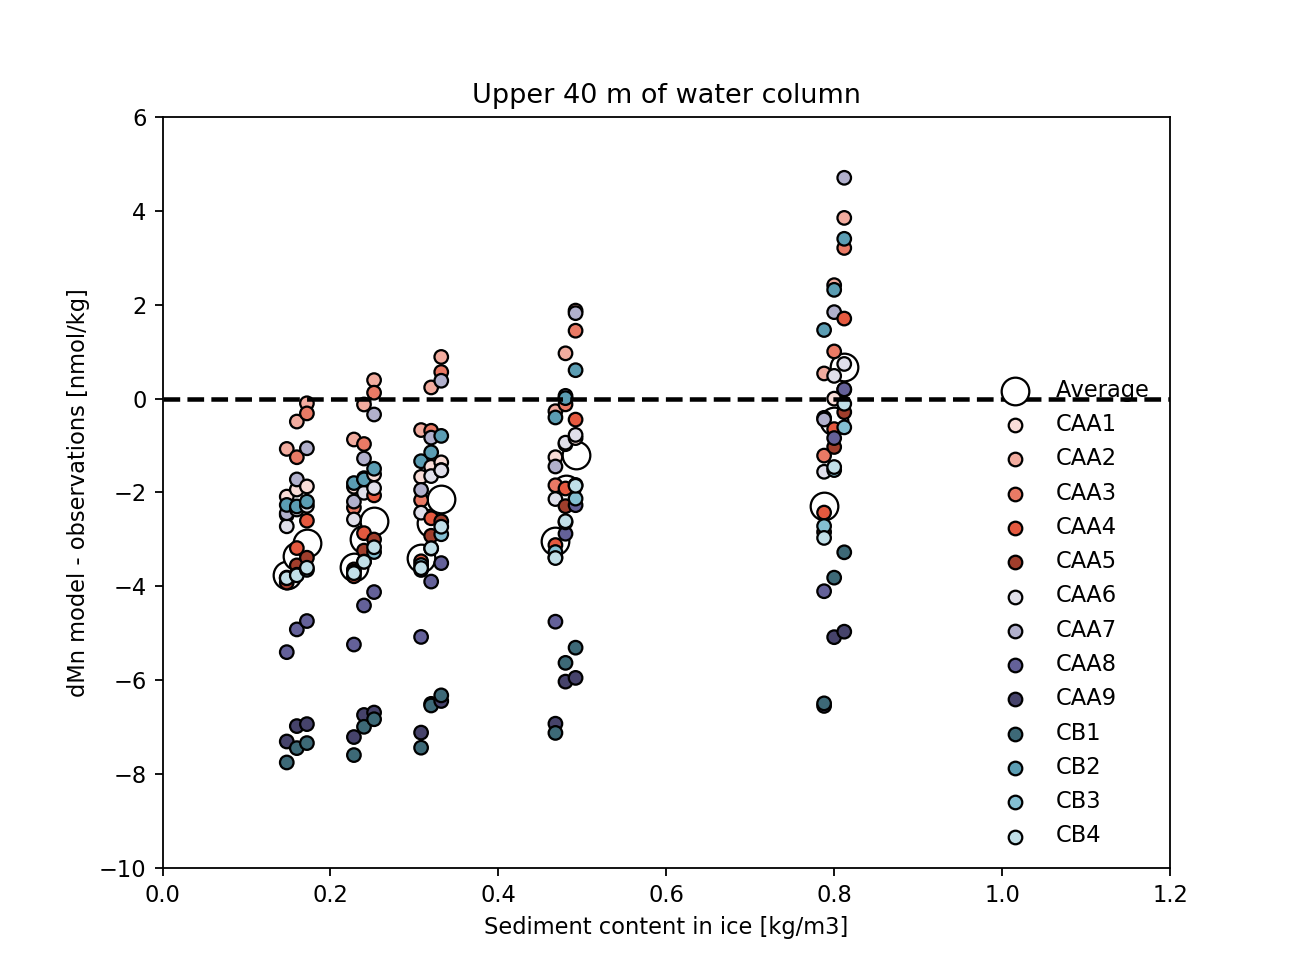

In [23]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.scatter(0.57*0.4, np.average(surface_10 - surface_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.60*0.4, np.average(surface_11 - surface_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.63*0.4, np.average(surface_12 - surface_obs), c='w', edgecolors='k', s=150, label='Average')
ax.scatter(0.57*0.4*np.ones(len(surface_10)), surface_10 - surface_obs, c=colors, edgecolors='k')
ax.scatter(0.60*0.4*np.ones(len(surface_11)), surface_11 - surface_obs, c=colors, edgecolors='k')
ax.scatter(0.63*0.4*np.ones(len(surface_12)), surface_12 - surface_obs, c=colors, edgecolors='k')

ax.scatter(0.37*0.4, np.average(surface_20 - surface_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.40*0.4, np.average(surface_21 - surface_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.43*0.4, np.average(surface_22 - surface_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.37*0.4*np.ones(len(surface_20)), surface_20 - surface_obs, c=colors, edgecolors='k')
ax.scatter(0.40*0.4*np.ones(len(surface_21)), surface_21 - surface_obs, c=colors, edgecolors='k')
ax.scatter(0.43*0.4*np.ones(len(surface_22)), surface_22 - surface_obs, c=colors, edgecolors='k')

ax.scatter(0.77*0.4, np.average(surface_30 - surface_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.80*0.4, np.average(surface_31 - surface_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.83*0.4, np.average(surface_32 - surface_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.77*0.4*np.ones(len(surface_30)), surface_30 - surface_obs, c=colors, edgecolors='k')
ax.scatter(0.80*0.4*np.ones(len(surface_31)), surface_31 - surface_obs, c=colors, edgecolors='k')
ax.scatter(0.83*0.4*np.ones(len(surface_32)), surface_32 - surface_obs, c=colors, edgecolors='k')

ax.scatter(1.17*0.4, np.average(surface_40 - surface_obs), c='w', edgecolors='k', s=150)
ax.scatter(1.20*0.4, np.average(surface_41 - surface_obs), c='w', edgecolors='k', s=150)
ax.scatter(1.23*0.4, np.average(surface_42 - surface_obs), c='w', edgecolors='k', s=150)
ax.scatter(1.17*0.4*np.ones(len(surface_40)), surface_40 - surface_obs, c=colors, edgecolors='k')
ax.scatter(1.20*0.4*np.ones(len(surface_41)), surface_41 - surface_obs, c=colors, edgecolors='k')
ax.scatter(1.23*0.4*np.ones(len(surface_42)), surface_42 - surface_obs, c=colors, edgecolors='k')

ax.scatter(1.97*0.4, np.average(surface_50 - surface_obs), c='w', edgecolors='k', s=150)
ax.scatter(2.00*0.4, np.average(surface_51 - surface_obs), c='w', edgecolors='k', s=150)
ax.scatter(2.03*0.4, np.average(surface_52 - surface_obs), c='w', edgecolors='k', s=150)
ax.scatter(1.97*0.4*np.ones(len(surface_50)), surface_50 - surface_obs, c=colors, edgecolors='k')
ax.scatter(2.00*0.4*np.ones(len(surface_51)), surface_51 - surface_obs, c=colors, edgecolors='k')
ax.scatter(2.03*0.4*np.ones(len(surface_52)), surface_52 - surface_obs, c=colors, edgecolors='k')

ax.plot([0, 10], [0, 0], '--k', linewidth = 2.0)

for stn in range(0,len(names)):
    ax.scatter(-10,0, c=colors[stn], edgecolors='k', label=names[stn])

ax.set_title('Upper 40 m of water column')
ax.set_xlim([0.0, 1.2])
ax.set_ylim([-10, 6])
ax.set_xlabel('Sediment content in ice [kg/m3]')
ax.set_ylabel('dMn model - observations [nmol/kg]')
ax.legend(frameon=False, fontsize=12)

ax.legend(frameon=False, loc=4)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/salinity_dmn.png')

<IPython.core.display.Javascript object>


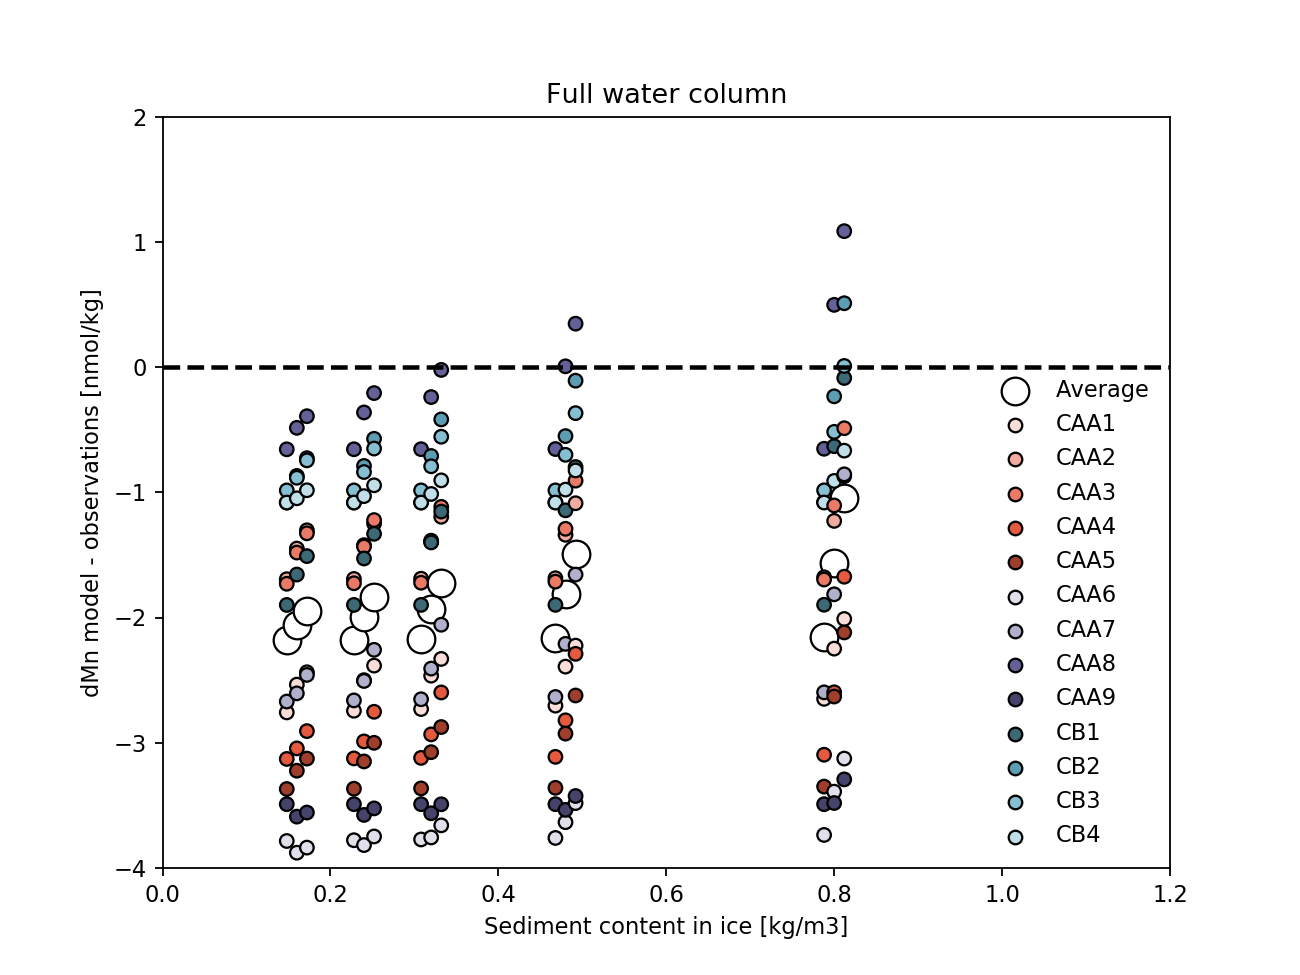

In [25]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.scatter(0.57*0.4, np.nanmean(average_10 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.60*0.4, np.nanmean(average_11 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.63*0.4, np.nanmean(average_12 - average_obs), c='w', edgecolors='k', s=150, label='Average')
ax.scatter(0.57*0.4*np.ones(len(average_10)), average_10 - average_obs, c=colors, edgecolors='k')
ax.scatter(0.60*0.4*np.ones(len(average_11)), average_11 - average_obs, c=colors, edgecolors='k')
ax.scatter(0.63*0.4*np.ones(len(average_12)), average_12 - average_obs, c=colors, edgecolors='k')

ax.scatter(0.37*0.4, np.nanmean(average_20 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.40*0.4, np.nanmean(average_21 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.43*0.4, np.nanmean(average_22 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.37*0.4*np.ones(len(average_20)), average_20 - average_obs, c=colors, edgecolors='k')
ax.scatter(0.40*0.4*np.ones(len(average_21)), average_21 - average_obs, c=colors, edgecolors='k')
ax.scatter(0.43*0.4*np.ones(len(average_22)), average_22 - average_obs, c=colors, edgecolors='k')

ax.scatter(0.77*0.4, np.nanmean(average_30 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.80*0.4, np.nanmean(average_31 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.83*0.4, np.nanmean(average_32 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.77*0.4*np.ones(len(average_30)), average_30 - average_obs, c=colors, edgecolors='k')
ax.scatter(0.80*0.4*np.ones(len(average_31)), average_31 - average_obs, c=colors, edgecolors='k')
ax.scatter(0.83*0.4*np.ones(len(average_32)), average_32 - average_obs, c=colors, edgecolors='k')

ax.scatter(1.17*0.4, np.nanmean(average_40 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(1.20*0.4, np.nanmean(average_41 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(1.23*0.4, np.nanmean(average_42 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(1.17*0.4*np.ones(len(average_40)), average_40 - average_obs, c=colors, edgecolors='k')
ax.scatter(1.20*0.4*np.ones(len(average_41)), average_41 - average_obs, c=colors, edgecolors='k')
ax.scatter(1.23*0.4*np.ones(len(average_42)), average_42 - average_obs, c=colors, edgecolors='k')

ax.scatter(1.97*0.4, np.nanmean(average_50 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(2.00*0.4, np.nanmean(average_51 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(2.03*0.4, np.nanmean(average_52 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(1.97*0.4*np.ones(len(average_50)), average_50 - average_obs, c=colors, edgecolors='k')
ax.scatter(2.00*0.4*np.ones(len(average_51)), average_51 - average_obs, c=colors, edgecolors='k')
ax.scatter(2.03*0.4*np.ones(len(average_52)), average_52 - average_obs, c=colors, edgecolors='k')

ax.plot([0, 10], [0, 0], '--k', linewidth = 2.0)

for stn in range(0,len(names)):
    ax.scatter(-10,0, c=colors[stn], edgecolors='k', label=names[stn])

ax.set_title('Full water column')
ax.set_xlim([0.0, 1.2])
ax.set_ylim([-4, 2])
ax.set_xlabel('Sediment content in ice [kg/m3]')
ax.set_ylabel('dMn model - observations [nmol/kg]')
ax.legend(frameon=False, fontsize=12)

ax.legend(frameon=False, loc=4)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/salinity_dmn.png')

<IPython.core.display.Javascript object>


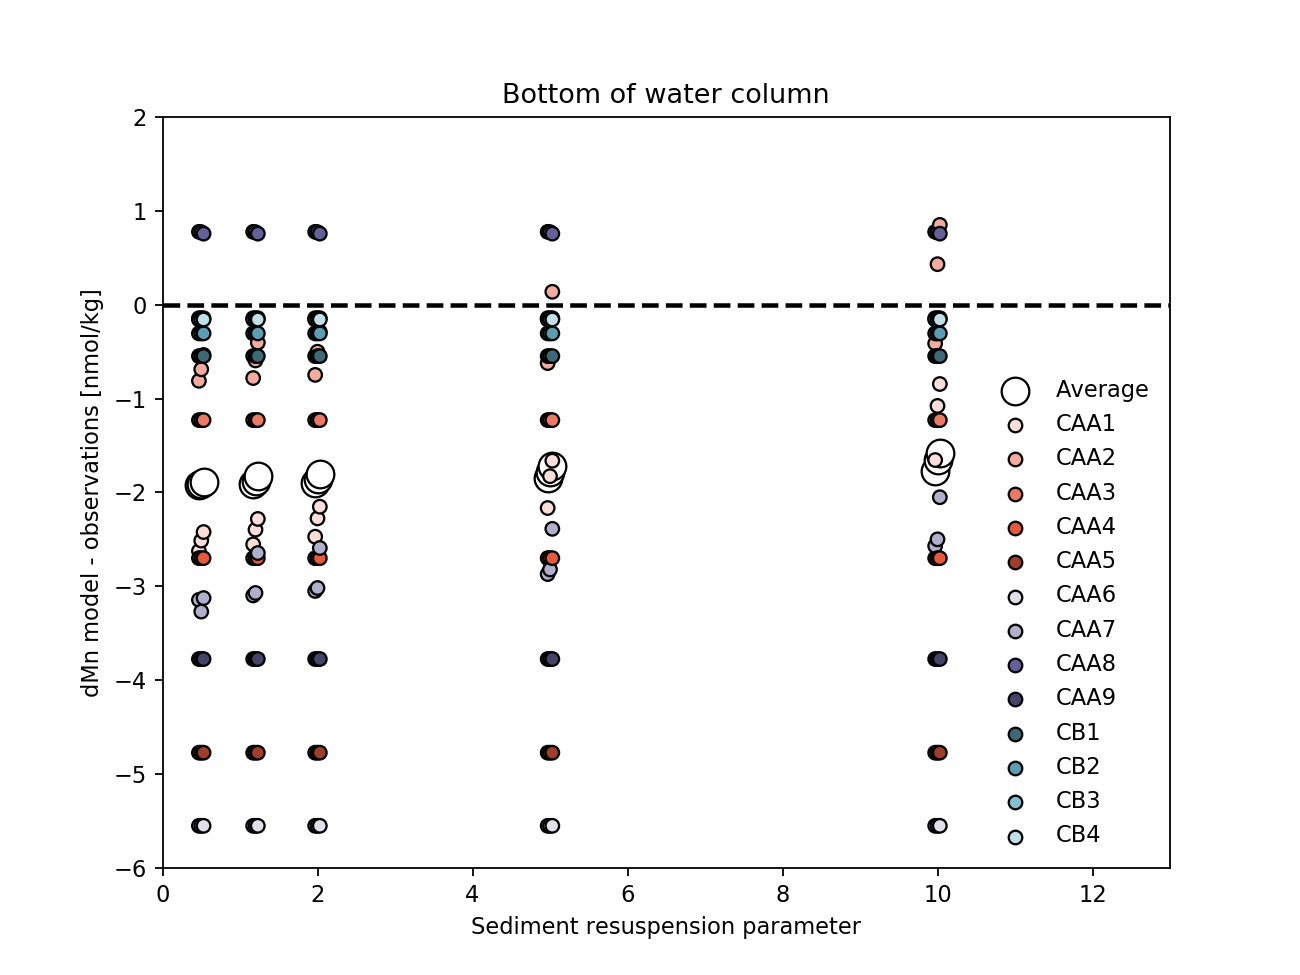

In [26]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.scatter(1.17, np.average(bottom_40 - bottom_obs), c='w', edgecolors='k', s=150)
ax.scatter(1.20, np.average(bottom_41 - bottom_obs), c='w', edgecolors='k', s=150)
ax.scatter(1.23, np.average(bottom_42 - bottom_obs), c='w', edgecolors='k', s=150, label='Average')
ax.scatter(1.17*np.ones(len(bottom_40)), bottom_40 - bottom_obs, c=colors, edgecolors='k')
ax.scatter(1.20*np.ones(len(bottom_41)), bottom_41 - bottom_obs, c=colors, edgecolors='k')
ax.scatter(1.23*np.ones(len(bottom_42)), bottom_42 - bottom_obs, c=colors, edgecolors='k')

ax.scatter(0.47, np.average(bottom_60 - bottom_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.50, np.average(bottom_61 - bottom_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.53, np.average(bottom_62 - bottom_obs), c='w', edgecolors='k', s=150)
ax.scatter(0.47*np.ones(len(bottom_60)), bottom_60 - bottom_obs, c=colors, edgecolors='k')
ax.scatter(0.50*np.ones(len(bottom_61)), bottom_61 - bottom_obs, c=colors, edgecolors='k')
ax.scatter(0.53*np.ones(len(bottom_62)), bottom_62 - bottom_obs, c=colors, edgecolors='k')

ax.scatter(1.97, np.average(bottom_70 - bottom_obs), c='w', edgecolors='k', s=150)
ax.scatter(2.00, np.average(bottom_71 - bottom_obs), c='w', edgecolors='k', s=150)
ax.scatter(2.03, np.average(bottom_72 - bottom_obs), c='w', edgecolors='k', s=150)
ax.scatter(1.97*np.ones(len(bottom_70)), bottom_70 - bottom_obs, c=colors, edgecolors='k')
ax.scatter(2.00*np.ones(len(bottom_71)), bottom_71 - bottom_obs, c=colors, edgecolors='k')
ax.scatter(2.03*np.ones(len(bottom_72)), bottom_72 - bottom_obs, c=colors, edgecolors='k')

ax.scatter(4.97, np.average(bottom_80 - bottom_obs), c='w', edgecolors='k', s=150)
ax.scatter(5.00, np.average(bottom_81 - bottom_obs), c='w', edgecolors='k', s=150)
ax.scatter(5.03, np.average(bottom_82 - bottom_obs), c='w', edgecolors='k', s=150)
ax.scatter(4.97*np.ones(len(bottom_80)), bottom_80 - bottom_obs, c=colors, edgecolors='k')
ax.scatter(5.00*np.ones(len(bottom_81)), bottom_81 - bottom_obs, c=colors, edgecolors='k')
ax.scatter(5.03*np.ones(len(bottom_82)), bottom_82 - bottom_obs, c=colors, edgecolors='k')

ax.scatter(9.97, np.average(bottom_90 - bottom_obs), c='w', edgecolors='k', s=150)
ax.scatter(10.00, np.average(bottom_91 - bottom_obs), c='w', edgecolors='k', s=150)
ax.scatter(10.03, np.average(bottom_92 - bottom_obs), c='w', edgecolors='k', s=150)
ax.scatter(9.97*np.ones(len(bottom_90)), bottom_90 - bottom_obs, c=colors, edgecolors='k')
ax.scatter(10.00*np.ones(len(bottom_91)), bottom_91 - bottom_obs, c=colors, edgecolors='k')
ax.scatter(10.03*np.ones(len(bottom_92)), bottom_92 - bottom_obs, c=colors, edgecolors='k')

ax.plot([0, 15], [0, 0], '--k', linewidth = 2.0)

for stn in range(0,len(names)):
    ax.scatter(-10,0, c=colors[stn], edgecolors='k', label=names[stn])

ax.set_title('Bottom of water column')
ax.set_xlim([0.0, 13])
ax.set_ylim([-6,2])
ax.set_xlabel('Sediment resuspension parameter')
ax.set_ylabel('dMn model - observations [nmol/kg]')
ax.legend(frameon=False, fontsize=12)

ax.legend(frameon=False, loc=4)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/salinity_dmn.png')

<IPython.core.display.Javascript object>


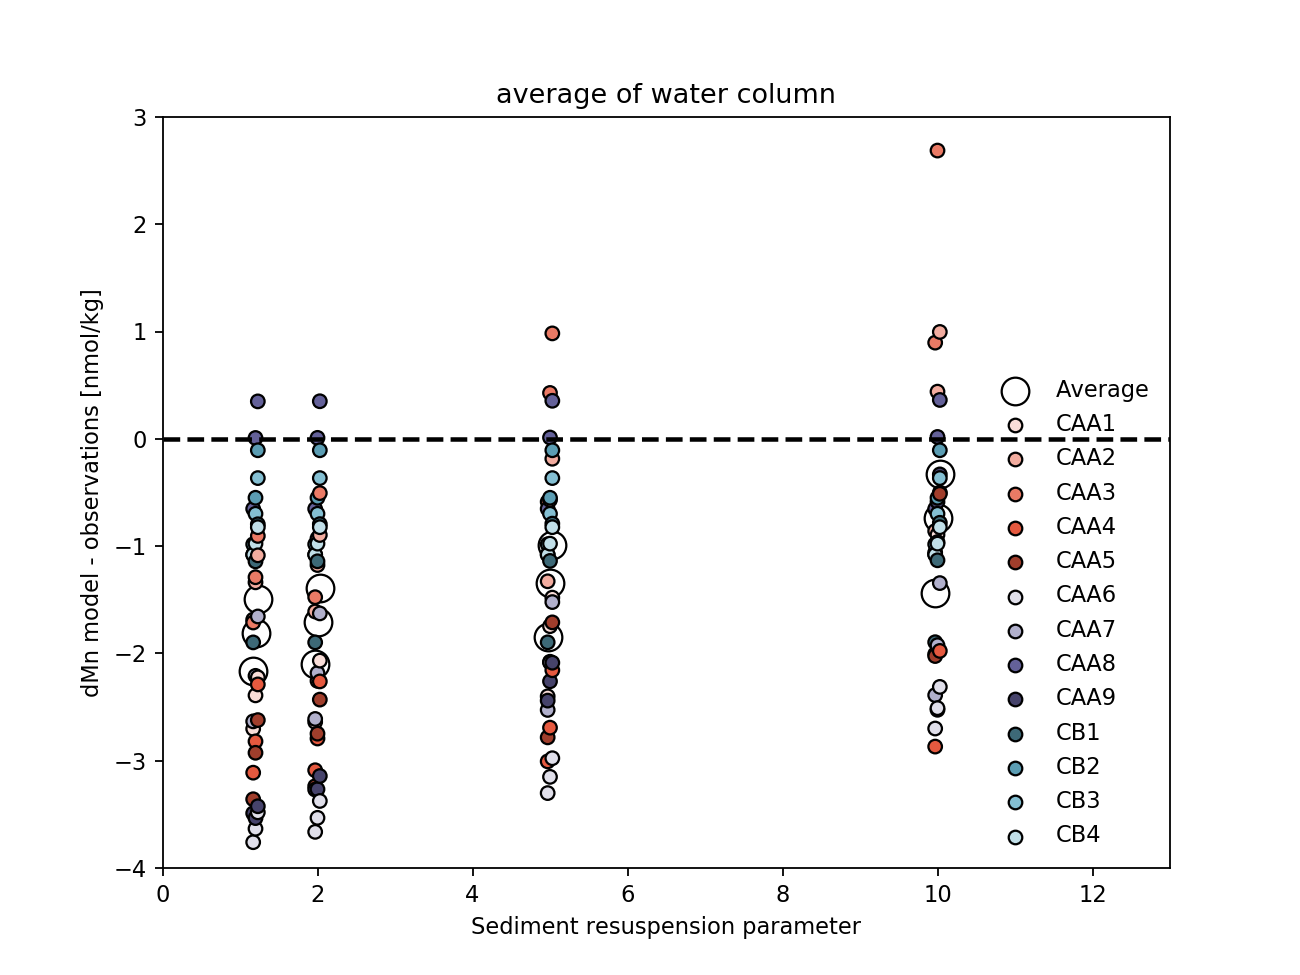

In [27]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.scatter(1.17, np.nanmean(average_40 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(1.20, np.nanmean(average_41 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(1.23, np.nanmean(average_42 - average_obs), c='w', edgecolors='k', s=150, label='Average')
ax.scatter(1.17*np.ones(len(average_40)), average_40 - average_obs, c=colors, edgecolors='k')
ax.scatter(1.20*np.ones(len(average_41)), average_41 - average_obs, c=colors, edgecolors='k')
ax.scatter(1.23*np.ones(len(average_42)), average_42 - average_obs, c=colors, edgecolors='k')

# ax.scatter(0.47, np.nanmean(average_60 - average_obs), c='w', edgecolors='k', s=150)
# ax.scatter(0.50, np.nanmean(average_61 - average_obs), c='w', edgecolors='k', s=150)
# ax.scatter(0.53, np.nanmean(average_62 - average_obs), c='w', edgecolors='k', s=150)
# ax.scatter(0.47*np.ones(len(average_60)), average_60 - average_obs, c=colors, edgecolors='k')
# ax.scatter(0.50*np.ones(len(average_61)), average_61 - average_obs, c=colors, edgecolors='k')
# ax.scatter(0.53*np.ones(len(average_62)), average_62 - average_obs, c=colors, edgecolors='k')

ax.scatter(1.97, np.nanmean(average_70 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(2.00, np.nanmean(average_71 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(2.03, np.nanmean(average_72 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(1.97*np.ones(len(average_70)), average_70 - average_obs, c=colors, edgecolors='k')
ax.scatter(2.00*np.ones(len(average_71)), average_71 - average_obs, c=colors, edgecolors='k')
ax.scatter(2.03*np.ones(len(average_72)), average_72 - average_obs, c=colors, edgecolors='k')

ax.scatter(4.97, np.nanmean(average_80 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(5.00, np.nanmean(average_81 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(5.03, np.nanmean(average_82 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(4.97*np.ones(len(average_80)), average_80 - average_obs, c=colors, edgecolors='k')
ax.scatter(5.00*np.ones(len(average_81)), average_81 - average_obs, c=colors, edgecolors='k')
ax.scatter(5.03*np.ones(len(average_82)), average_82 - average_obs, c=colors, edgecolors='k')

ax.scatter(9.97, np.nanmean(average_90 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(10.00, np.nanmean(average_91 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(10.03, np.nanmean(average_92 - average_obs), c='w', edgecolors='k', s=150)
ax.scatter(9.97*np.ones(len(average_90)), average_90 - average_obs, c=colors, edgecolors='k')
ax.scatter(10.00*np.ones(len(average_91)), average_91 - average_obs, c=colors, edgecolors='k')
ax.scatter(10.03*np.ones(len(average_92)), average_92 - average_obs, c=colors, edgecolors='k')


ax.plot([0, 15], [0, 0], '--k', linewidth = 2.0)

for stn in range(0,len(names)):
    ax.scatter(-10,0, c=colors[stn], edgecolors='k', label=names[stn])

ax.set_title('average of water column')
ax.set_xlim([0.0, 13])
ax.set_ylim([-4,3])
ax.set_xlabel('Sediment resuspension parameter')
ax.set_ylabel('dMn model - observations [nmol/kg]')
ax.legend(frameon=False, fontsize=12)

ax.legend(frameon=False, loc=4)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/salinity_dmn.png')